## Dataset Loading and Exploration

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
# Path to your dataset folder
dataset_path = '/content/drive/MyDrive/TrafficSignDataSet'

# Load pickle files
with open(os.path.join(dataset_path, 'train.pickle'), 'rb') as f:
    train_data = pickle.load(f)
with open(os.path.join(dataset_path, 'valid.pickle'), 'rb') as f:
    valid_data = pickle.load(f)
with open(os.path.join(dataset_path, 'test.pickle'), 'rb') as f:
    test_data = pickle.load(f)

In [ ]:
X_train, y_train = train_data['features'], train_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_valid.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (34799, 32, 32, 3)
Validation set shape: (4410, 32, 32, 3)
Testing set shape: (12630, 32, 32, 3)


In [ ]:
sign_names = pd.read_csv(os.path.join(dataset_path, 'label_names.csv'))
sign_names.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


## Data Preprocessing

In [ ]:
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
print("Before normalization:")
print("Data type:", X_train.dtype)
print("Min pixel value:", np.min(X_train))
print("Max pixel value:", np.max(X_train))

Before normalization:
Data type: uint8
Min pixel value: 0
Max pixel value: 255


In [ ]:
# Convert to float32 and normalize
X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

print("After normalization:")
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

After normalization:
Min: 0.0
Max: 1.0


In [ ]:
num_classes = len(np.unique(y_train))

y_train_cat = to_categorical(y_train, num_classes)
y_valid_cat = to_categorical(y_valid, num_classes)
y_test_cat  = to_categorical(y_test,  num_classes)

print("Example (before):", y_train[0])
print("Example (after one-hot):", y_train_cat[0])

Example (before): 41
Example (after one-hot): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
X_train, y_train_cat = shuffle(X_train, y_train_cat, random_state=42)

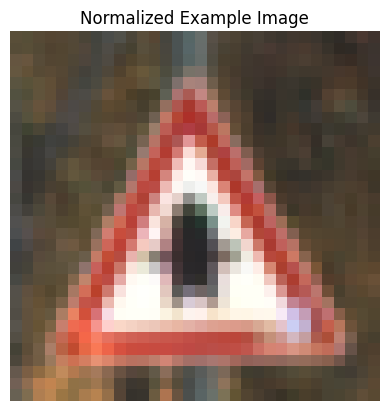

In [ ]:
plt.imshow(X_train[0])
plt.title("Normalized Example Image")
plt.axis('off')
plt.show()

## CNN Architecture Design and Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
model = Sequential([
    # Convolutional Layer + BatchNorm + MaxPool
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Convolutional Layer + BatchNorm + MaxPool
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Convolutional Layer
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Flatten for Dense Layers
    Flatten(),

    # Fully Connected Layer
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Output Layer
    Dense(43, activation='softmax')  # 43 traffic sign classes
])

# Model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 629,739 (2.40 MB)

 Trainable params: 629,291 (2.40 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_valid, y_valid_cat),
    epochs=15,
    batch_size=64,
    verbose=1
)

Epoch 1/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.6555 - loss: 1.4012 - val_accuracy: 0.8948 - val_loss: 0.3413
Epoch 2/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9640 - loss: 0.1167 - val_accuracy: 0.9565 - val_loss: 0.1672
Epoch 3/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9776 - loss: 0.0699 - val_accuracy: 0.9508 - val_loss: 0.1825
Epoch 4/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9802 - loss: 0.0625 - val_accuracy: 0.9594 - val_loss: 0.1485
Epoch 5/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9832 - loss: 0.0520 - val_accuracy: 0.9469 - val_loss: 0.2063
Epoch 6/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9876 - loss: 0.0447 - val_accuracy: 0.9576 - val_loss: 0.1794
Epoch 7/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9903 - loss: 0.0341 - val_accuracy: 0.9596 - val_loss: 0.2003
Epoch 8/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9873 - loss: 0.0436 - val_accuracy: 

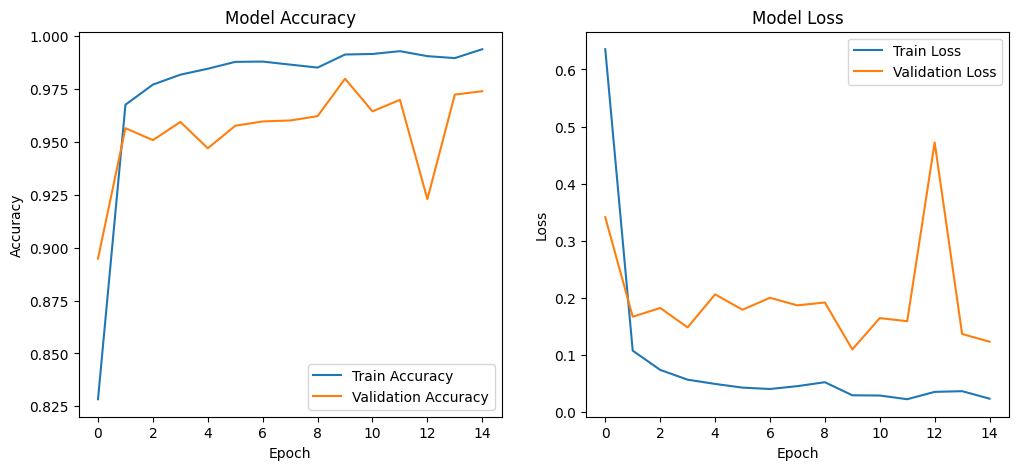

In [ ]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 96.37%


## Model Evaluation, Confusion Matrix & Predictions

In [ ]:
# Evaluate model performance on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9641 - loss: 0.1861

Test Accuracy: 96.37%
Test Loss: 0.2019


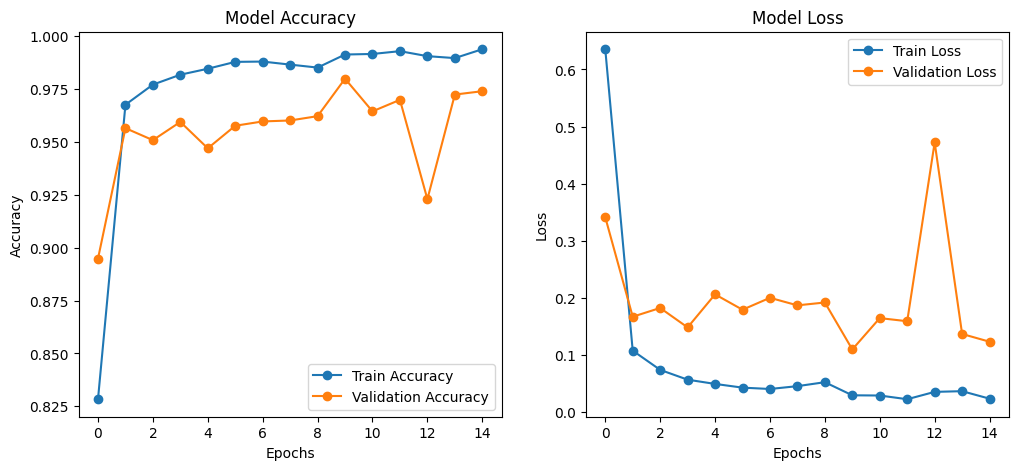

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


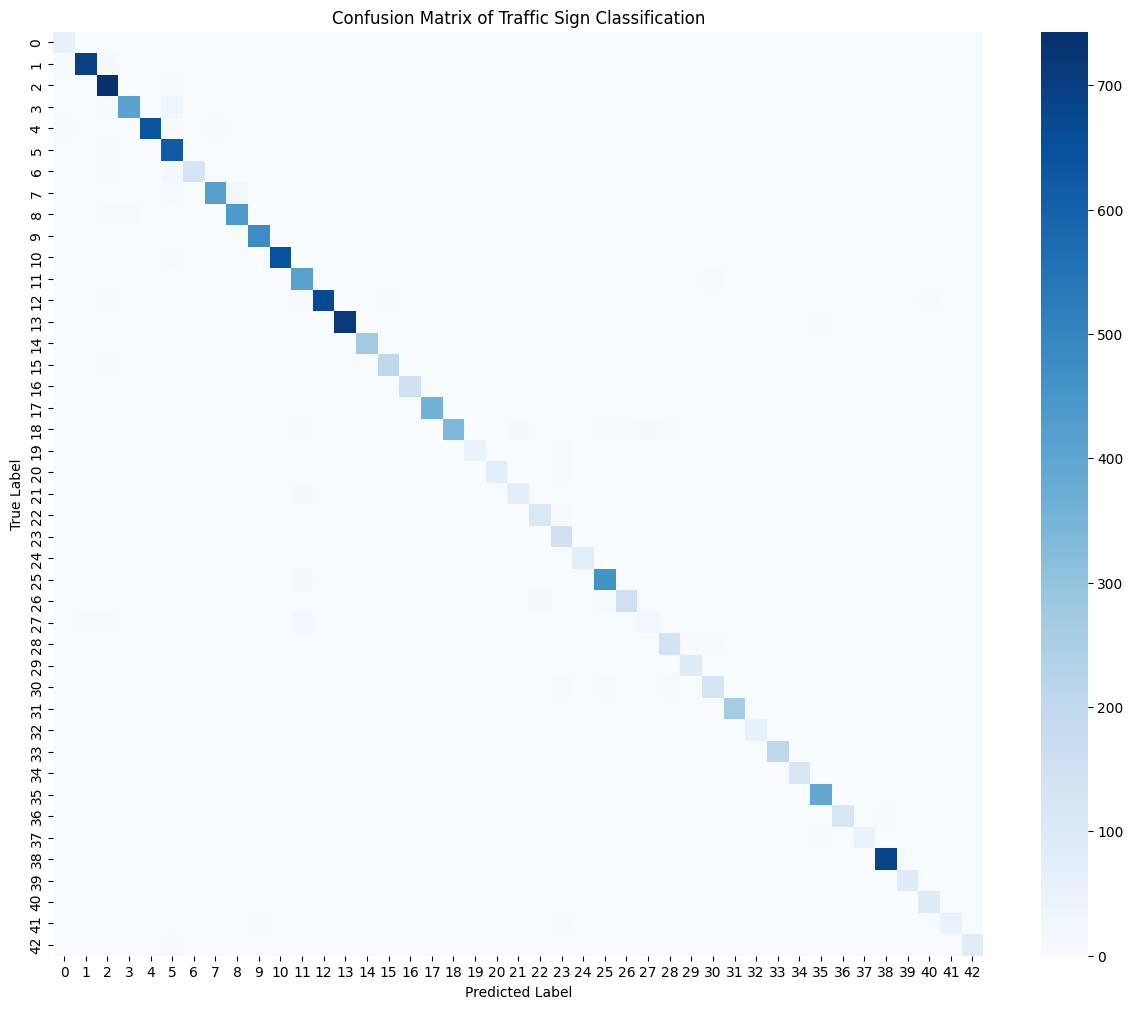

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(15, 12))
sns.heatmap(cm, cmap='Blues', annot=False)
plt.title("Confusion Matrix of Traffic Sign Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes))


Classification Report:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        60
           1       0.98      0.97      0.98       720
           2       0.94      0.99      0.96       750
           3       0.98      0.91      0.94       450
           4       1.00      0.97      0.98       660
           5       0.89      0.98      0.94       630
           6       0.94      0.85      0.90       150
           7       0.98      0.92      0.95       450
           8       0.94      0.97      0.95       450
           9       0.99      0.99      0.99       480
          10       1.00      0.98      0.99       660
          11       0.89      0.98      0.93       420
          12       1.00      0.97      0.98       690
          13       1.00      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.97      0.98      0.98       210
          16       1.00      0.99      1.00       150
  

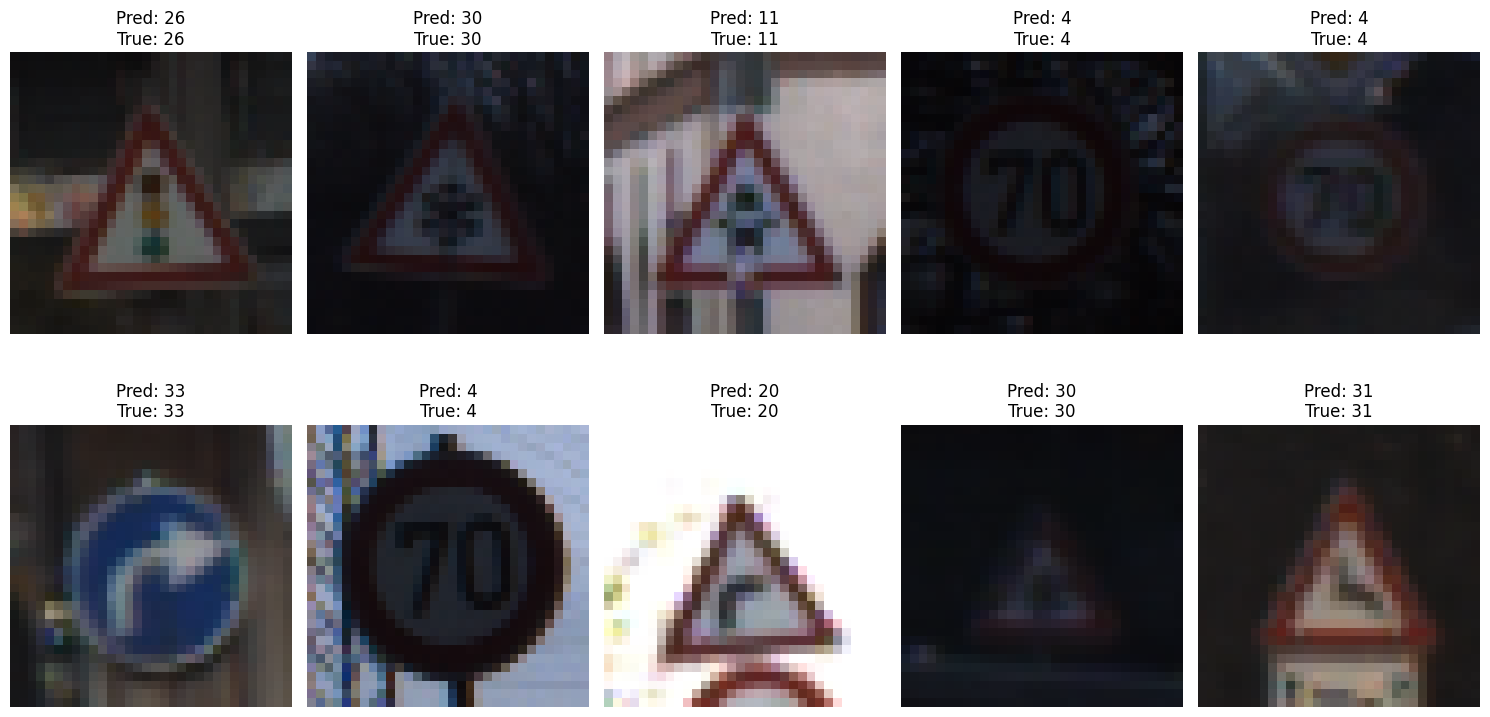

In [ ]:
import random

# Display random predictions
plt.figure(figsize=(15, 8))
for i in range(10):
    index = random.randint(0, len(X_test) - 1)
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[index])
    plt.axis('off')
    plt.title(f"Pred: {y_pred_classes[index]}\nTrue: {y_true[index]}")
plt.tight_layout()
plt.show()

## Model Saving, Loading & Prediction on New Images

In [ ]:
# Save your trained CNN model
model.save('/content/drive/MyDrive/TrafficSignDataSet/traffic_sign_cnn_model.h5')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/TrafficSignDataSet/traffic_sign_cnn_model.h5')
print("Model loaded successfully!")

# Verify by checking accuracy again
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test_cat)
print(f"Loaded model test accuracy: {test_accuracy*100:.2f}%")

Model loaded successfully!
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9641 - loss: 0.1861
Loaded model test accuracy: 96.37%


In [ ]:
import pandas as pd

# Load label names from the CSV file
labels_df = pd.read_csv('/content/drive/MyDrive/TrafficSignDataSet/label_names.csv')

# Convert to Python list
label_names = labels_df['SignName'].tolist()

print("Label names loaded successfully!")
print(f"Total classes: {len(label_names)}")
print(label_names[:10])  # show first 10

Label names loaded successfully!
Total classes: 43
['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


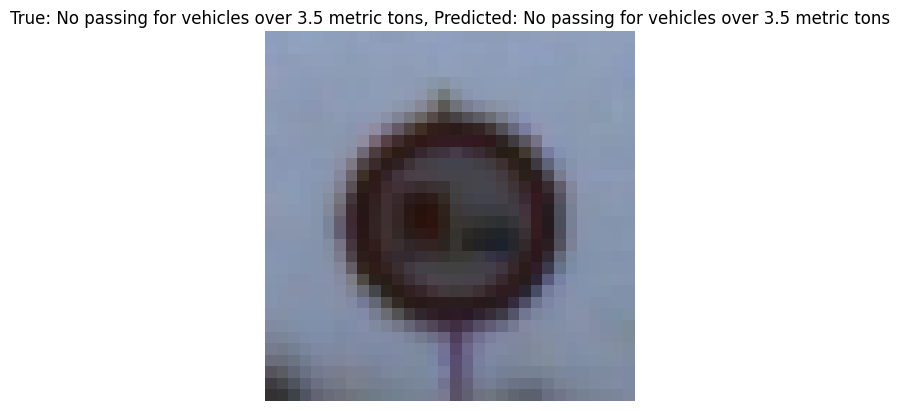

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a random image from test data
idx = np.random.randint(0, len(X_test))
image = X_test[idx]
true_label = y_test[idx]

# Predict using the loaded model
pred = loaded_model.predict(np.expand_dims(image, axis=0))
pred_label = np.argmax(pred)

# Display the image with prediction
plt.imshow(image)
plt.title(f"True: {label_names[true_label]}, Predicted: {label_names[pred_label]}")
plt.axis('off')
plt.show()

Saving Screenshot 2025-10-30 231935.png to Screenshot 2025-10-30 231935.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


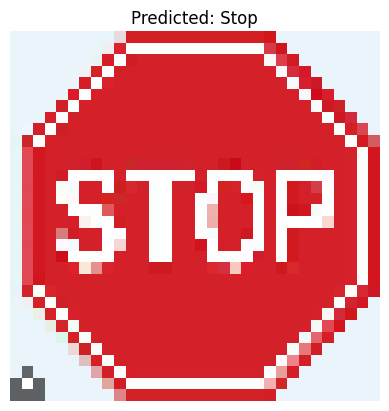

In [ ]:
from google.colab import files

# Upload a new image
uploaded = files.upload()

for img_name in uploaded.keys():
    img_path = f'/content/{img_name}'
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (32, 32))  # same size as training images
    img_normalized = img_resized / 255.0
    img_input = np.expand_dims(img_normalized, axis=0)

    # Prediction
    pred = loaded_model.predict(img_input)
    pred_label = np.argmax(pred)

    plt.imshow(img_resized)
    plt.title(f"Predicted: {label_names[pred_label]}")
    plt.axis('off')
    plt.show()

In [ ]:
import pickle

with open('/content/drive/MyDrive/TrafficSignDataSet/label_names.pickle', 'wb') as f:
    pickle.dump(label_names, f)
print("Label names saved.")

Label names saved.


## Visualization using Grad-CAM (Gradient-weighted Class Activation Mapping)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,888,323 (7.20 MB)

 Trainable params: 629,291 (2.40 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,258,584 (4.80 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Found last conv layer (from core): conv2d_2
Using layer from loaded_model: conv2d_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


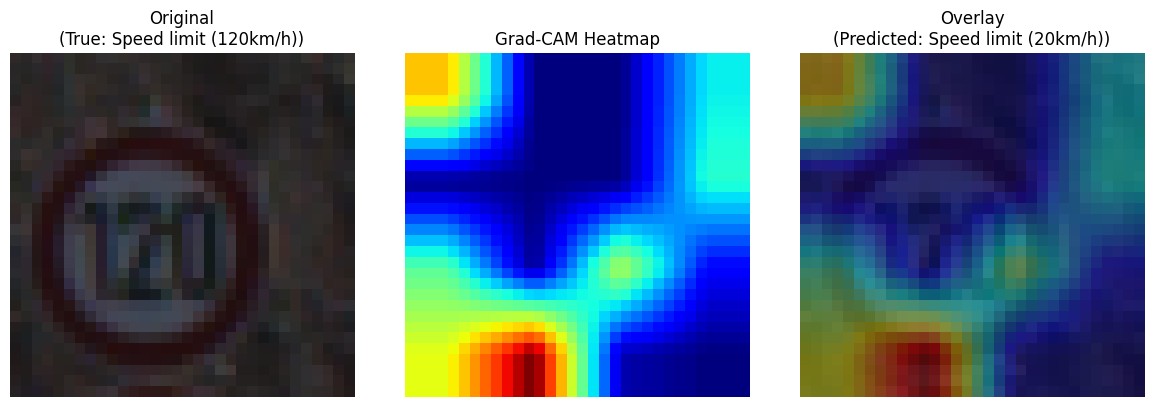

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import collections.abc

# --- Assumptions: X_test, y_test, loaded_model, label_names exist in session ---

# pick random test image
idx = np.random.randint(0, len(X_test))
input_image_np = np.expand_dims(X_test[idx], axis=0)   # numpy (1, H, W, C)
true_label = y_test[idx]

# Warm-up
_ = loaded_model.predict(input_image_np)

# unwrap helper (same as before)
def unwrap_model(model):
    if hasattr(model, "layers") and len(model.layers) == 1 and hasattr(model.layers[0], "layers"):
        return model.layers[0]
    return model

model_core = unwrap_model(loaded_model)

# find last Conv2D layer object (recursive)
def get_last_conv_layer_obj(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer
        elif hasattr(layer, "layers"):
            inner = get_last_conv_layer_obj(layer)
            if inner:
                return inner
    return None

last_conv_layer_obj = get_last_conv_layer_obj(model_core)
if last_conv_layer_obj is None:
    raise ValueError("❌ No Conv2D layer found in model_core!")

print("Found last conv layer (from core):", last_conv_layer_obj.name)

# find same-named layer inside loaded_model (safer)
try:
    target_layer_in_loaded = loaded_model.get_layer(last_conv_layer_obj.name)
    print("Using layer from loaded_model:", target_layer_in_loaded.name)
except ValueError:
    # fallback
    target_layer_in_loaded = last_conv_layer_obj
    print("Warning: layer name not found in loaded_model; using layer object from core (less safe)")

# Helper: pack numpy input into the same structure as model.input(s)
def pack_inputs_for_model(model, np_input):
    """
    Returns `inputs_for_call` suitable to pass to model(...) or grad_model(...).
    If model.input is a single tensor -> returns a single tf.Tensor.
    If model.input is a list/tuple -> returns a list of tf.Tensor where the first placeholder
    is filled with np_input and others (if any) are zeros / copies as reasonable.
    (Most traffic-sign models are single-input; this supports multi-input defensively.)
    """
    model_inputs = model.inputs  # list of KerasTensors (could be length 1)
    # Diagnostic: print model input structure and shapes
    # print("Model inputs (count):", len(model_inputs))
    # for i, inp in enumerate(model_inputs):
    #     print(f" - input[{i}].shape: {inp.shape}, name: {inp.name}, dtype: {inp.dtype}")

    # Convert the numpy array to a TensorFlow tensor
    input_tensor = tf.convert_to_tensor(np_input, dtype=tf.float32)

    # Always return a list, even for single input models
    if len(model_inputs) == 1:
        return [input_tensor]
    else:
        inputs_for_call = [input_tensor]
        for i in range(1, len(model_inputs)):
            inp = model_inputs[i]
            batch = np_input.shape[0]
            other_shape = [batch] + [int(x) if x is not None else 1 for x in inp.shape[1:]]
            zeros = np.zeros(other_shape, dtype=np.float32)
            inputs_for_call.append(tf.convert_to_tensor(zeros, dtype=tf.float32))
        return inputs_for_call


# Build grad-cam function robust to input structure
def make_gradcam_heatmap(img_array_np, model, target_layer):
    """
    img_array_np: numpy array (1,H,W,C) or appropriate batch-packed array
    model: loaded_model (Functional/Sequential)
    target_layer: Layer instance inside model
    """
    # Define the input layer explicitly
    input_layer = tf.keras.Input(shape=model.input_shape[1:], dtype=model.input.dtype)

    # Build the grad_model by connecting layers from the original model
    # This approach is more robust to differences in input structure after loading
    x = input_layer
    for layer in model.layers:
        # Check if the current layer is the target layer for Grad-CAM
        if layer.name == target_layer.name:
            conv_output = layer(x)
            x = conv_output
        else:
             # Need to handle potential list inputs for the first layer if model has multiple inputs
            if isinstance(x, list) and len(model.layers) > 0 and layer == model.layers[0]:
                 # If the model expects multiple inputs but we only have one,
                 # try to pass the single tensor to the first layer.
                 # This assumes the first layer can handle a single tensor input,
                 # which is common for models built using the Functional API with a single input.
                 if len(x) == 1:
                     x = layer(x[0])
                 else:
                     # If there are multiple inputs, pass the list
                     x = layer(x)
            elif isinstance(x, list) and len(x) == 1:
                 # If the previous layer output was a list with one tensor,
                 # unwrap it before passing to the next layer.
                 x = layer(x[0])
            elif isinstance(x, list):
                 # If the previous layer output was a list with multiple tensors,
                 # pass the list to the next layer (assuming it can handle it).
                 x = layer(x)
            else:
                x = layer(x)

    predictions = x

    grad_model = tf.keras.models.Model(
        inputs=input_layer,
        outputs=[conv_output, predictions]
    )


    # Use the processed input tensor directly
    img_array_tf = tf.convert_to_tensor(img_array_np, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(img_array_tf)
        conv_outputs, predictions = grad_model(img_array_tf)

        # pred index and class score
        pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]

    # gradients wrt conv outputs
    grads = tape.gradient(loss, conv_outputs)  # shape: (1, h, w, channels)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # (channels,)
    conv_outputs = conv_outputs[0]  # (h, w, channels)

    # compute weighted combination
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.nn.relu(heatmap)
    denom = tf.math.reduce_max(heatmap) + 1e-8
    heatmap = heatmap / denom
    return heatmap.numpy()

# Generate heatmap (this uses model's exact input structure)
heatmap = make_gradcam_heatmap(input_image_np, loaded_model, target_layer_in_loaded)

# Visualize overlay (same as before)
h, w = X_test.shape[1], X_test.shape[2]
heatmap_resized = cv2.resize(heatmap, (w, h))

# Convert original image to uint8
orig_img_uint8 = np.uint8(255 * X_test[idx]) if X_test.max() <= 1.0 else np.uint8(X_test[idx])

# Colorize heatmap and overlay
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
heatmap_colored_rgb = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)
overlay_img = cv2.addWeighted(orig_img_uint8, 0.6, heatmap_colored_rgb, 0.4, 0)

# Prediction for caption
pred = loaded_model.predict(input_image_np)
pred_label = np.argmax(pred)

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(orig_img_uint8); plt.title(f"Original\n(True: {label_names[true_label]})"); plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(heatmap_resized, cmap='jet'); plt.title("Grad-CAM Heatmap"); plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(overlay_img); plt.title(f"Overlay\n(Predicted: {label_names[pred_label]})"); plt.axis('off')
plt.tight_layout(); plt.show()